In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os

In [2]:
# getting the path of ds
ds_dir = "/kaggle/input/digit-recognizer"
samp_sub_path = os.path.join(ds_dir, "sample_submission.csv")
train_path = os.path.join(ds_dir, "train.csv")
test_path = os.path.join(ds_dir, "test.csv")

In [3]:
# reading the ds
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.shape

(28000, 784)

In [5]:
# total number of training exps
total_training_exps = train_df.shape[0]
total_training_exps

42000

In [6]:
# checking in null in each column
train_df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

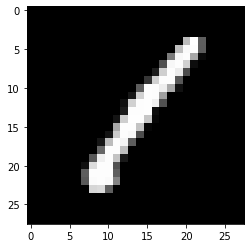

In [7]:
# getting the input pixel into array format and converted into array batch format
X = train_df.iloc[:,  1:].values.reshape(-1, 28, 28, 1)
# getting the labels from train dataframe
y = train_df['label'].values
# ploting the first example into gray color format
plt.imshow(X[0], cmap='gray')

In [8]:
train_df.describe()
# max value of pixel is 255 and min = 0 so need to normalize 

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [9]:
# splitting tthe dataset into training and test part and normalize the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train_norm = X_train/255.0
X_test_norm = X_test/255.0

In [10]:
y_train.shape
X_train.shape

(37800, 28, 28, 1)

In [11]:
# counting the uniques in label columns of train_df

train_df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

<AxesSubplot:>

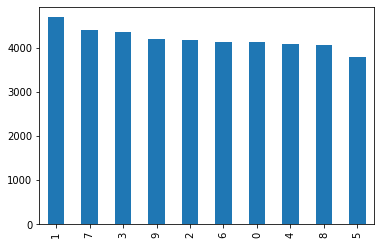

In [12]:
train_df['label'].value_counts().plot(kind='bar')

In [13]:
# digits in dataset
train_df['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

# Classification using Convolution Neural Network
1. create the model architecture 
2. compile the model
3. fit the dataset on CNN model.

In [14]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [15]:
# model architecture
model = Sequential()
model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(10, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 10)        330       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 360)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                23104     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2

2023-01-06 09:28:02.241794: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [16]:
X_test.shape

(4200, 28, 28, 1)

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=15, 
                    validation_data=(X_test, y_test))


2023-01-06 09:28:02.759826: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
/opt/conda/lib/python3.7/site-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


Epoch 1/15
1182/1182 [==============================] - 8s 6ms/step - loss: 0.5533 - accuracy: 0.8551 - val_loss: 0.1961 - val_accuracy: 0.9438
Epoch 2/15
1182/1182 [==============================] - 7s 6ms/step - loss: 0.1373 - accuracy: 0.9590 - val_loss: 0.1325 - val_accuracy: 0.9629
Epoch 3/15
1182/1182 [==============================] - 7s 6ms/step - loss: 0.0918 - accuracy: 0.9721 - val_loss: 0.1087 - val_accuracy: 0.9674
Epoch 4/15
1182/1182 [==============================] - 8s 6ms/step - loss: 0.0737 - accuracy: 0.9780 - val_loss: 0.1010 - val_accuracy: 0.9714
Epoch 5/15
1182/1182 [==============================] - 7s 6ms/step - loss: 0.0608 - accuracy: 0.9812 - val_loss: 0.0876 - val_accuracy: 0.9733
Epoch 6/15
1182/1182 [==============================] - 7s 6ms/step - loss: 0.0499 - accuracy: 0.9843 - val_loss: 0.0845 - val_accuracy: 0.9736
Epoch 7/15
1182/1182 [==============================] - 6s 5ms/step - loss: 0.0424 - accuracy: 0.9870 - val_loss: 0.0854 - val_accuracy:

In [18]:
model.evaluate(X_test, 
               y_test, 
               verbose=2
              )

132/132 - 0s - loss: 0.0819 - accuracy: 0.9814


[0.08185943961143494, 0.9814285635948181]

In [19]:
test_df.shape

(28000, 784)

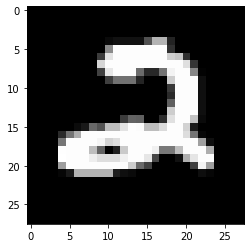

In [20]:
test = test_df.values.reshape(-1, 28, 28, 1)
plt.imshow(test[0], cmap='gray')

In [21]:

test_preds = model.predict(test)
test_preds.shape

(28000, 10)

In [22]:
test_labels = np.argmax(test_preds, axis=1)
len(test_labels)

28000

In [23]:
ImageId = list(np.arange(1, test_df.shape[0]+1))
test_submission = pd.DataFrame({
    'ImageId': ImageId, 
    'Label': test_labels
})
test_submission.to_csv('submission.csv', index=False)